In [2]:
import os, sys
import re
import json
import glob
import datetime
from collections import Counter

import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

from nltk.corpus import stopwords
from wordcloud import WordCloud

In [16]:
def slack_test(path):
    combined = []

    for json_file in glob.glob(f"{path}/all-week*/*.json"):
        with open(json_file, 'r', encoding="utf8") as slack_data:
            data = json.load(slack_data)  # or json.loads(slack_data.read()) if using loads
            combined.append(data)
    return combined

df = pd.DataFrame(slack_test("C:/Users/Diriba/Desktop/10AC/Projects/week0_starter_network_analysis/anonymized/"))


In [18]:
# print size of the data
print(df.size)

22700


In [19]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,217,218,219,220,221,222,223,224,225,226
0,"{'type': 'message', 'subtype': 'channel_join',...","{'type': 'message', 'subtype': 'channel_join',...",None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
1,"{'type': 'message', 'subtype': 'channel_join',...","{'type': 'message', 'subtype': 'channel_join',...","{'type': 'message', 'subtype': 'channel_join',...","{'type': 'message', 'subtype': 'channel_join',...","{'type': 'message', 'subtype': 'channel_join',...","{'type': 'message', 'subtype': 'channel_join',...",None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
2,"{'type': 'message', 'subtype': 'channel_join',...","{'type': 'message', 'subtype': 'channel_join',...","{'type': 'message', 'subtype': 'channel_join',...","{'type': 'message', 'subtype': 'channel_join',...","{'type': 'message', 'subtype': 'channel_join',...",None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
3,"{'type': 'message', 'subtype': 'channel_join',...","{'type': 'message', 'subtype': 'channel_join',...","{'type': 'message', 'subtype': 'channel_join',...","{'type': 'message', 'subtype': 'channel_join',...","{'type': 'message', 'subtype': 'channel_join',...","{'type': 'message', 'subtype': 'channel_join',...",None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
4,{'client_msg_id': 'ea9fd8fa-84f7-4ce2-9de9-899...,{'client_msg_id': 'f05ef062-cbc2-4299-ac65-5b1...,{'client_msg_id': '18d6e888-f8c8-4574-ac97-4e8...,{'client_msg_id': 'c205705e-d0df-4584-ba65-abe...,{'client_msg_id': 'd72be403-b1e1-47ab-b146-f4e...,{'client_msg_id': 'af38075a-fd77-40bb-8bac-64d...,{'client_msg_id': 'f7fa2db2-24c2-4329-a795-e6a...,{'client_msg_id': '56a0ce80-ef73-4db9-b783-de5...,{'client_msg_id': 'FD68CE19-6C3E-4764-80B8-CEC...,{'client_msg_id': 'f6828438-b47f-4cd5-8a9f-8aa...,...,None,None,None,None,None,None,None,None,None,None


In [20]:
#describe the data
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,217,218,219,220,221,222,223,224,225,226
count,100,89,85,83,82,79,75,72,71,69,...,1,1,1,1,1,1,1,1,1,1
unique,100,89,85,83,82,79,75,72,71,69,...,1,1,1,1,1,1,1,1,1,1
top,"{'type': 'message', 'subtype': 'channel_join',...","{'type': 'message', 'subtype': 'channel_join',...","{'type': 'message', 'subtype': 'channel_join',...","{'type': 'message', 'subtype': 'channel_join',...","{'type': 'message', 'subtype': 'channel_join',...","{'type': 'message', 'subtype': 'channel_join',...",{'client_msg_id': 'f7fa2db2-24c2-4329-a795-e6a...,{'client_msg_id': '56a0ce80-ef73-4db9-b783-de5...,{'client_msg_id': 'FD68CE19-6C3E-4764-80B8-CEC...,{'client_msg_id': 'f6828438-b47f-4cd5-8a9f-8aa...,...,{'client_msg_id': '76f04ec7-a79d-43e3-8286-973...,{'client_msg_id': '8900652d-e546-4121-9f3f-b6d...,{'client_msg_id': '44263dae-18d2-4929-b7b6-e81...,{'client_msg_id': '50ba3afb-7f77-439d-986c-802...,"{'type': 'message', 'text': 'i got error when ...","{'type': 'message', 'text': 'we are facing thi...",{'client_msg_id': 'e141aab6-5850-430b-a2ea-6d5...,{'client_msg_id': '1002415d-9929-4881-87b0-ad4...,{'client_msg_id': '6d3e3953-9034-4a90-afee-82b...,{'client_msg_id': 'db5817dd-9445-49f3-95b3-d24...
freq,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [21]:
#shape of the data
df.shape

(100, 227)

In [22]:
# data columns
df.columns

RangeIndex(start=0, stop=227, step=1)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Columns: 227 entries, 0 to 226
dtypes: object(227)
memory usage: 177.5+ KB


In [25]:
#  finding missing values
missing_values = df.isnull().sum()
print(f"missingValues (s) count: \n{missing_values}")

missingValues (s) count: 
0       0
1      11
2      15
3      17
4      18
       ..
222    99
223    99
224    99
225    99
226    99
Length: 227, dtype: int64


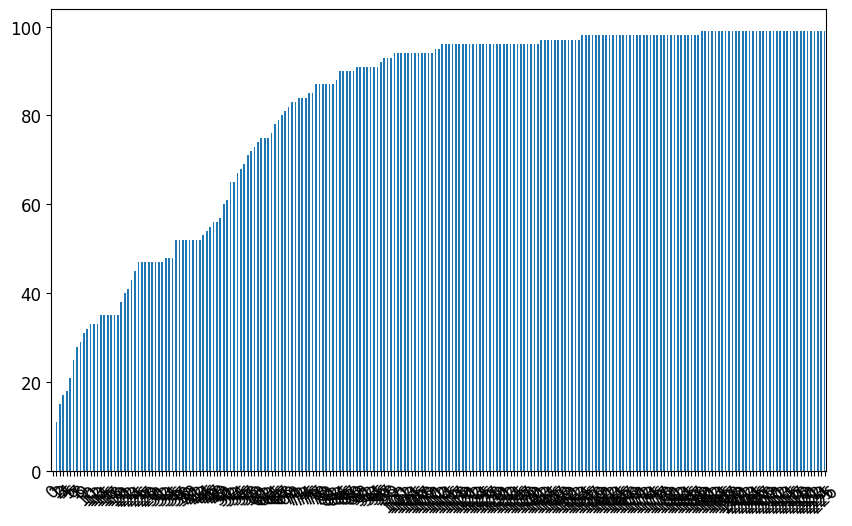

In [26]:
#plot a graph for missing value
fig = missing_values.plot(kind='bar',fontsize=12, figsize=(10, 6), rot=45).get_figure()

In [ ]:
max_reply_user = df.loc[df['reply_count'].idxmax(), 'sender_id']

print(f"The user with the highest number of reply counts is user {max_reply_user}.")

In [32]:
columns_list = df.columns.tolist()

# Display the list of columns
print("Columns in the DataFrame:", columns_list)


Columns in the DataFrame: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216